In [55]:
import pandas as pd
from pandas import DataFrame as df
import re

In [56]:
df = pd.read_csv('../../4.데이터/preprocessing_data.csv')
df = pd.DataFrame(df, columns=['published_at','description'])
print(df.head())

  published_at  \
0   2021-05-31   
1   2021-05-30   
2   2021-05-26   
3   2021-05-14   
4   2021-04-25   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       description  
0                                                                                                                                                                                                                                                                                                                                                                                                     

In [57]:
df.description = df.description.astype(str)

In [58]:
# ----사이 소갯말 지우기
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import numpy as np
np.set_printoptions(threshold=np.inf, linewidth=np.inf) 

In [64]:
# remove_text = df.description[3]
# print(remove_text)

여러분 안녕하세요 경돼입니다.

모두

Be more positive!


------------------------------------------------------------------------------
경희대학교(서울) 졸업
전공 : 생물학, 취미 : 유도, 파워리프팅, 여행, 영상 편집
Gear : Sony a6500, Sony FDR-X3000, Galaxy S9
Business E-mail : yikw91@gmail.com
-------------------------------------------------------------------------------
SNS
https://www.instagram.com/kw1000lbs/
-------------------------------------------------------------------------------


In [107]:

# removed_text = re.sub(r'\[경희][^)]*\[졸업]', '', remove_text)


--


여러분 안녕하세요 경돼입니다.

모두

Be more positive!


------------------------------------------------------------------------------
경희대학교(서울) 졸업
전공 : 생물학, 취미 : 유도, 파워리프팅, 여행, 영상 편집
Gear : Sony a6500, Sony FDR-X3000, Galaxy S9
Business E-mail : yikw91@gmail.com
-------------------------------------------------------------------------------
SNS
https://www.instagram.com/kw1000lbs/
-------------------------------------------------------------------------------


In [122]:
df['descriptipon'] = df['description'].str.replace('ㄱ-ㅎㅏ-가-힣', ' ', regex=True)

In [125]:
# 빈 문자열 NaN으로
clean_data = df.replace({'': np.nan})
clean_data = clean_data.replace(r'^\s*$', None, regex=True)
# NaN 삭제
clean_data.dropna(how='any', inplace=True)

clean_data = clean_data.reset_index(drop=True)
print(clean_data.isnull().values.any())

False


In [132]:
from konlpy.tag import *
okt = Okt()

In [133]:
# KoNLP preprocessing


data_list = clean_data.description.values.tolist()
data_word=[]

for i in range(len(data_list)):
    try:
        data_word.append(okt.nouns(data_list[i]))
    except Exception as e:
        continue

data_word

[['아이템', '전'],
 ['출근', '전', '벤치', '프레', '스'],
 [],
 ['여러분',
  '경',
  '모두',
  '경희대학교',
  '서울',
  '졸업',
  '전공',
  '생물학',
  '취미',
  '유도',
  '파워리프팅',
  '여행',
  '영상',
  '편집'],
 ['벚꽃', '슈', '레딩'],
 ['또머슈', '레딩'],
 ['여러분',
  '경',
  '이제',
  '운동',
  '하루',
  '번',
  '말',
  '변화',
  '한번',
  '닭',
  '가슴',
  '살',
  '단백질',
  '할인',
  '링크',
  '링크',
  '통해',
  '가입',
  '경희대학교',
  '서울',
  '졸업',
  '전공',
  '생물학',
  '취미',
  '유도',
  '파워리프팅',
  '여행',
  '영상',
  '편집'],
 ['주말', '유도'],
 ['여러분',
  '경',
  '경희대학교',
  '서울',
  '졸업',
  '전공',
  '생물학',
  '취미',
  '유도',
  '파워리프팅',
  '여행',
  '영상',
  '편집'],
 ['여러분',
  '경',
  '경희대학교',
  '서울',
  '졸업',
  '전공',
  '생물학',
  '취미',
  '유도',
  '파워리프팅',
  '여행',
  '영상',
  '편집'],
 ['여러분',
  '경',
  '경희대학교',
  '서울',
  '졸업',
  '전공',
  '생물학',
  '취미',
  '유도',
  '파워리프팅',
  '여행',
  '영상',
  '편집'],
 ['여러분',
  '경',
  '설',
  '연휴',
  '경희대학교',
  '서울',
  '졸업',
  '전공',
  '생물학',
  '취미',
  '유도',
  '파워리프팅',
  '여행',
  '영상',
  '편집'],
 ['여러분',
  '경',
  '경희대학교',
  '서울',
  '졸업',
  '전공',
  '생물학',
  '취미',
  '유도',
  

In [149]:
!pip install gensim
from gensim.corpora.dictionary import Dictionary
import gensim as gensim
from gensim import corpora
from gensim.models.wrappers import LdaMallet

ModuleNotFoundError: No module named 'gensim.models.wrappers'

In [150]:
# /Users/mzc01-yunsu/Downloads/mallet-2.0.8
id2word = corpora.Dictionary(data_word)
id2word.filter_extremes(no_below=20) # 20회 이하 단어 삭제
texts = data_word
corpus = [id2word.doc2bow(text) for text in texts]

# mallet_path = '/Users/mzc01-yunsu/Downloads/mallet-2.0.8'
# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)
ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=10, id2word=id2word)

In [158]:
from gensim.models.coherencemodel import CoherenceModel

In [159]:
coherence_model_ldamodel = CoherenceModel(model=ldamodel, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamodel = coherence_model_ldamodel.get_coherence()


def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=10, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=data_word, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [160]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=4, limit=21, step=2)

In [161]:
limit=21; start=4; step=2;
x = range(start, limit, step)
topic_num = 0
count = 0
max_coherence = 0
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence values of", cv)
    coherence = cv
    if coherence >= max_coherence:
        max_coherence = coherence
        topic_num = m
        model_list_num = count
    count = count+1
    

Num Topics = 4  has Coherence values of 0.43014953281915885
Num Topics = 6  has Coherence values of 0.46955352888607205
Num Topics = 8  has Coherence values of 0.40948330771876895
Num Topics = 10  has Coherence values of 0.41695188752613344
Num Topics = 12  has Coherence values of 0.35005843164284106
Num Topics = 14  has Coherence values of 0.5093428228785661
Num Topics = 16  has Coherence values of 0.39444810204734937
Num Topics = 18  has Coherence values of 0.38137165595643907
Num Topics = 20  has Coherence values of 0.37850989496566345


In [162]:
# model select 
optimal_model = model_list[model_list_num]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(0, '0.153*"운동" + 0.044*"루틴" + 0.032*"진행" + 0.029*"것" + 0.024*"데드리프트" + 0.021*"위주" + 0.020*"등" + 0.019*"중" + 0.018*"스쿼트" + 0.018*"유튜브"'), (1, '0.065*"코드" + 0.048*"운동" + 0.048*"할인" + 0.027*"입력" + 0.027*"편집" + 0.027*"링크" + 0.024*"추천" + 0.024*"이상" + 0.023*"여러분" + 0.023*"여행"'), (2, '0.072*"운동" + 0.058*"여행" + 0.051*"영상편집" + 0.046*"광고" + 0.046*"협찬" + 0.046*"문의" + 0.045*"및" + 0.042*"여러분" + 0.036*"졸업" + 0.030*"중"'), (3, '0.054*"여러분" + 0.051*"여행" + 0.048*"졸업" + 0.044*"편집" + 0.037*"더" + 0.026*"시청" + 0.026*"모두" + 0.024*"진행" + 0.023*"훈련" + 0.023*"중"'), (4, '0.056*"코드" + 0.049*"여행" + 0.044*"할인" + 0.039*"링크" + 0.037*"여러분" + 0.036*"졸업" + 0.034*"편집" + 0.028*"마이" + 0.028*"입력" + 0.024*"틴"'), (5, '0.055*"여러분" + 0.054*"여행" + 0.049*"졸업" + 0.044*"편집" + 0.032*"운동" + 0.029*"것" + 0.027*"코드" + 0.022*"할인" + 0.017*"링크" + 0.016*"추천"'), (6, '0.058*"코드" + 0.056*"할인" + 0.041*"링크" + 0.036*"입력" + 0.030*"여행" + 0.030*"추천" + 0.026*"이상" + 0.023*"졸업" + 0.022*"가슴" + 0.022*"여러분"'), (7, '0.043*"중" + 0.037*"재학" + 0.034*"운동" + 

In [185]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    #ldamodel[corpus]: lda_model에 corpus를 넣어 각 토픽 당 확률을 알 수 있음
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num,topn=10)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    print(type(sent_topics_df))

    # Add original text to the end of the output
    #contents = pd.Series(texts)
    #sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df = pd.concat([sent_topics_df, Data['description'],Data['published_at']], axis=1)
    return(sent_topics_df)

# def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts):
#     sent_topics_df = pd.DataFrame()
    
#     # Get main topics in each document
#     for i, row in enumerate(ldamodel[corpus]):
#         row = sorted(row, key=lambda x: (x[1]), reverse=True)
#         #Get the dominant topic, Perc Contribution and Keywords for each document
#         for j, (topic_num, prop_topic) in enumerate(row):
#             if j == 0: # => dominant topic
#                 wp = ldamodel.show_topic(topic_num, topn=10)
#                 topic_keywords = ", ".join([word for word, prop in wp])
#                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#             else: 
#                 break
#     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
#     print(type(sent_topics_df))
    
#     # add original text to the end of the output
#     sent_topics_df = pd.DataFrame()
#     sent_topics_df = pd.concat([sent_topics_df, Data['description'], Data['published_at']], axis=1)
#     return(sent_topics_df)


In [186]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_list)

<class 'pandas.core.frame.DataFrame'>


In [188]:
df_topic_desc = df_topic_sents_keywords.reset_index()
# print(df_topic_desc.head())
df_topic_desc.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'description','published_at']
print(df_topic_desc.head())

   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             3.0               0.550   
1            1             9.0               0.449   
2            2             0.0               0.100   
3            3             3.0               0.850   
4            4             5.0               0.700   

                                      Keywords description published_at  
0        여러분, 여행, 졸업, 편집, 더, 시청, 모두, 진행, 훈련, 중         NaN          NaN  
1  데드리프트, 여행, 졸업, 가슴, 편집, 훈련, 스트렝스, 여러분, 닭, 프로         NaN          NaN  
2     운동, 루틴, 진행, 것, 데드리프트, 위주, 등, 중, 스쿼트, 유튜브         NaN          NaN  
3        여러분, 여행, 졸업, 편집, 더, 시청, 모두, 진행, 훈련, 중         NaN          NaN  
4       여러분, 여행, 졸업, 편집, 운동, 것, 코드, 할인, 링크, 추천         NaN          NaN  


In [190]:
# Group top 5 sentences under each topic
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

In [191]:
# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)


topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_counts.sort_index(inplace=True)

topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution

lda_inform = pd.concat([sent_topics_sorteddf, topic_counts, topic_contribution], axis=1)
lda_inform.columns=["Topic_Num", "Topic_Perc_Contrib", "Keywords", "description", "published_at","Num_Documents", "Perc_Documents"]
lda_inform = lda_inform[["Topic_Num","Keywords","Num_Documents","Perc_Documents"]]
lda_inform
#lda_inform.Topic_Num = lda_inform.Topic_Num.astype(int)
lda_inform['Topic_Num'] =lda_inform['Topic_Num'] +1
lda_inform.Topic_Num = lda_inform.Topic_Num.astype(str)
lda_inform['Topic_Num'] =lda_inform['Topic_Num'].str.split('.').str[0]
df_topic_desc['Dominant_Topic'] =df_topic_desc['Dominant_Topic'] +1
df_topic_desc.Dominant_Topic = df_topic_desc.Dominant_Topic.astype(str)
df_topic_desc['Dominant_Topic'] =df_topic_desc['Dominant_Topic'].str.split('.').str[0]

In [192]:
# 토픽 모델링 결과 확인
lda_inform.to_csv ("./lda_inform.csv", index = None)
lda_inform

,Topic_Num,Keywords,Num_Documents,Perc_Documents
0.0,1,"운동, 루틴, 진행, 것, 데드리프트, 위주, 등, 중, 스쿼트, 유튜브",188,0.3144
1.0,2,"코드, 운동, 할인, 입력, 편집, 링크, 추천, 이상, 여러분, 여행",5,0.0084
2.0,3,"운동, 여행, 영상편집, 광고, 협찬, 문의, 및, 여러분, 졸업, 중",141,0.2358
3.0,4,"여러분, 여행, 졸업, 편집, 더, 시청, 모두, 진행, 훈련, 중",90,0.1505
4.0,5,"코드, 여행, 할인, 링크, 여러분, 졸업, 편집, 마이, 입력, 틴",4,0.0067
5.0,6,"여러분, 여행, 졸업, 편집, 운동, 것, 코드, 할인, 링크, 추천",31,0.0518
6.0,7,"코드, 할인, 링크, 입력, 여행, 추천, 이상, 졸업, 가슴, 여러분",8,0.0134
7.0,8,"중, 재학, 운동, 영상편집, 여행, 구독, 시청, 코드, 오늘, 것",50,0.0836
8.0,9,"코드, 할인, 추천, 이상, 입력, 링크, 편집, 여행, 여러분, 구입",54,0.0903
9.0,10,"데드리프트, 여행, 졸업, 가슴, 편집, 훈련, 스트렝스, 여러분, 닭, 프로",27,0.0452


In [195]:
for i in range(1,topic_num+1):
    globals()['df_{}'.format(i)]=df_topic_desc.loc[df_topic_desc.Dominant_Topic==str(i)]
    globals()['df_{}'.format(i)].sort_values('Topic_Perc_Contrib',ascending=False,inplace = True)
    globals()['df_{}'.format(i)].to_csv ("./topic("+str(i)+")_desc.csv", index = None)

df_1

<ipython-input-195-e5b76d95a5d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()['df_{}'.format(i)].sort_values('Topic_Perc_Contrib',ascending=False,inplace = True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,description,published_at
487,487,1,0.9727,"운동, 루틴, 진행, 것, 데드리프트, 위주, 등, 중, 스쿼트, 유튜브",NaN,NaN
481,481,1,0.9727,"운동, 루틴, 진행, 것, 데드리프트, 위주, 등, 중, 스쿼트, 유튜브",NaN,NaN
483,483,1,0.9690,"운동, 루틴, 진행, 것, 데드리프트, 위주, 등, 중, 스쿼트, 유튜브",NaN,NaN
521,521,1,0.9679,"운동, 루틴, 진행, 것, 데드리프트, 위주, 등, 중, 스쿼트, 유튜브",NaN,NaN
411,411,1,0.9678,"운동, 루틴, 진행, 것, 데드리프트, 위주, 등, 중, 스쿼트, 유튜브",NaN,NaN
471,471,1,0.9667,"운동, 루틴, 진행, 것, 데드리프트, 위주, 등, 중, 스쿼트, 유튜브",NaN,NaN
463,463,1,0.9667,"운동, 루틴, 진행, 것, 데드리프트, 위주, 등, 중, 스쿼트, 유튜브",NaN,NaN
420,420,1,0.9667,"운동, 루틴, 진행, 것, 데드리프트, 위주, 등, 중, 스쿼트, 유튜브",NaN,NaN
458,458,1,0.9654,"운동, 루틴, 진행, 것, 데드리프트, 위주, 등, 중, 스쿼트, 유튜브",NaN,NaN
482,482,1,0.9625,"운동, 루틴, 진행, 것, 데드리프트, 위주, 등, 중, 스쿼트, 유튜브",NaN,NaN


In [206]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

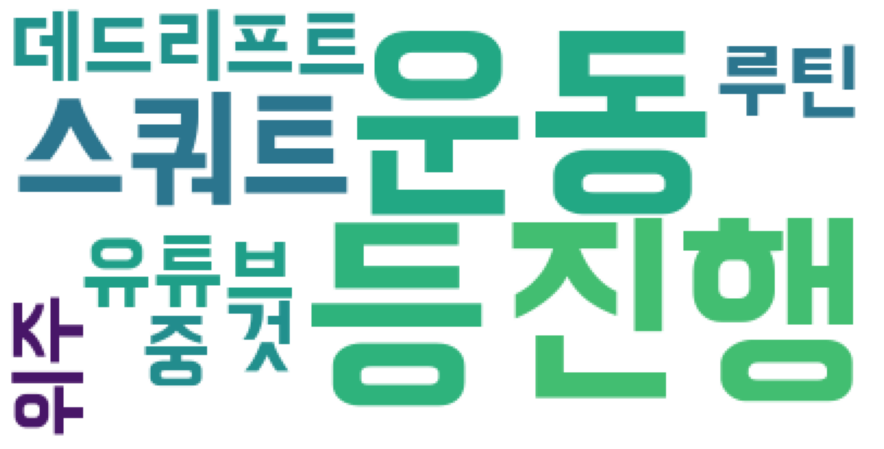

<Figure size 432x288 with 0 Axes>

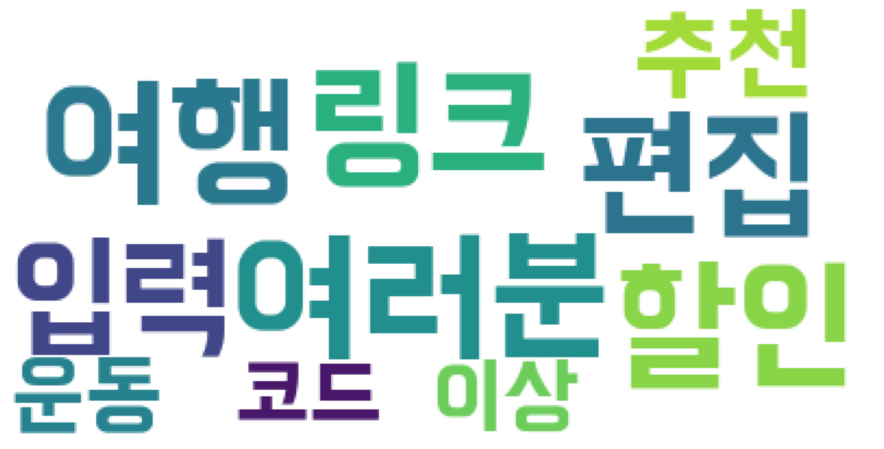

<Figure size 432x288 with 0 Axes>

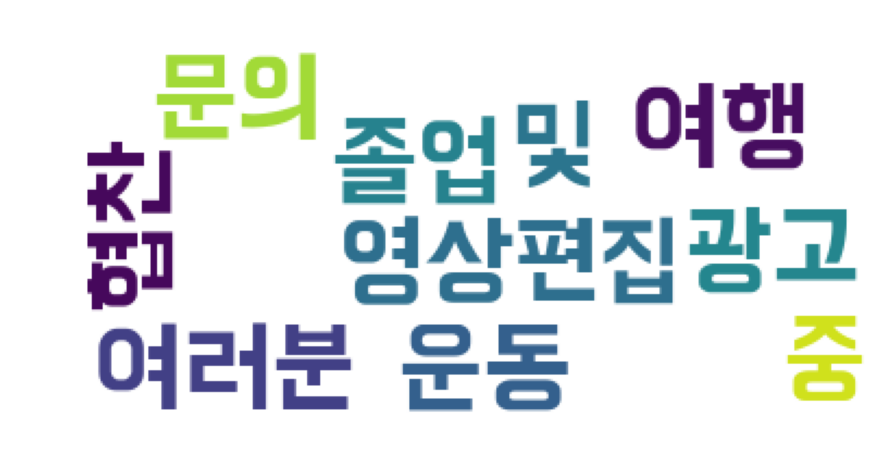

<Figure size 432x288 with 0 Axes>

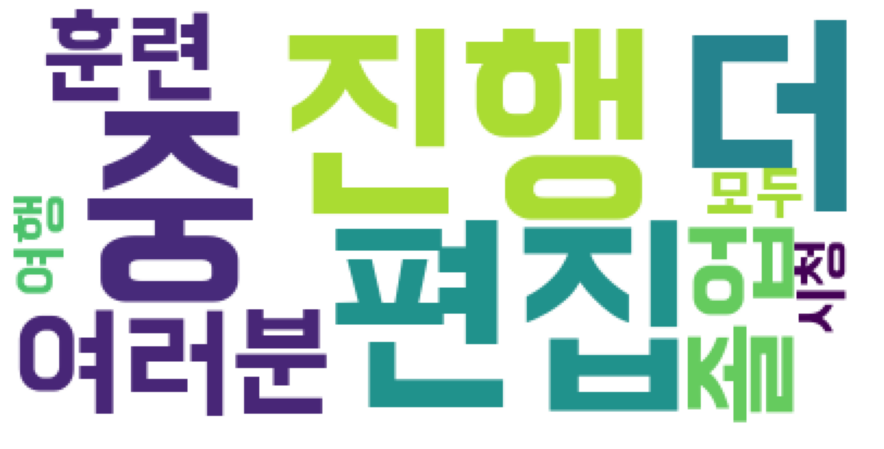

<Figure size 432x288 with 0 Axes>

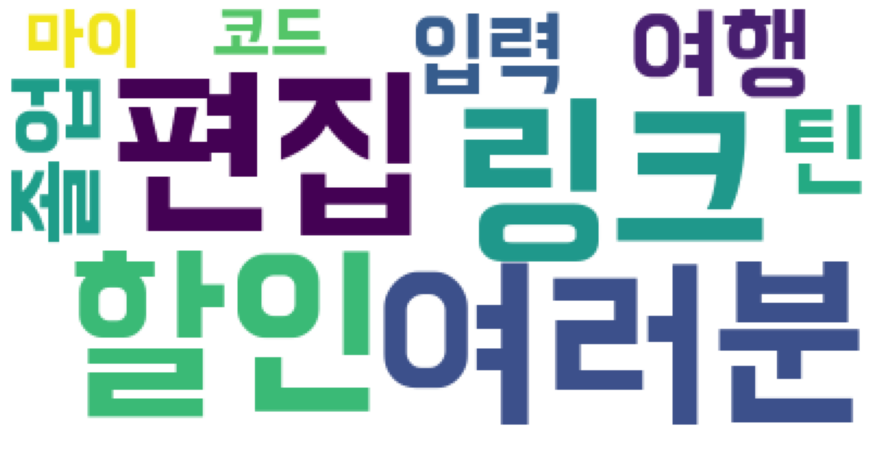

<Figure size 432x288 with 0 Axes>

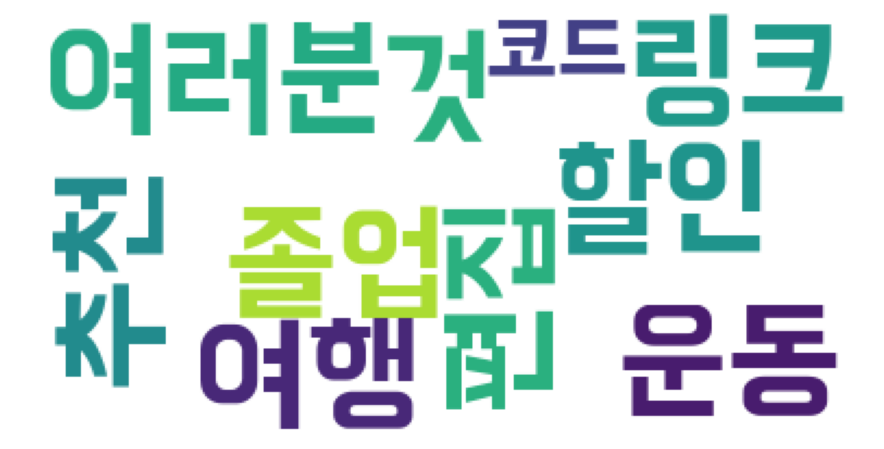

<Figure size 432x288 with 0 Axes>

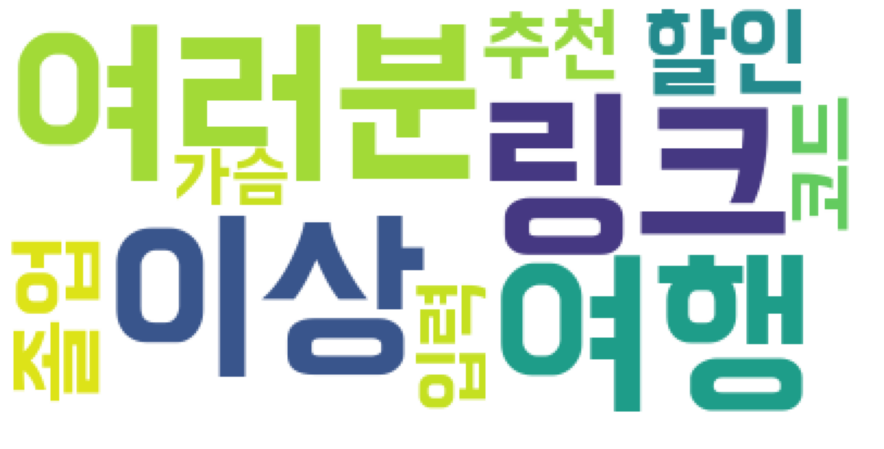

<Figure size 432x288 with 0 Axes>

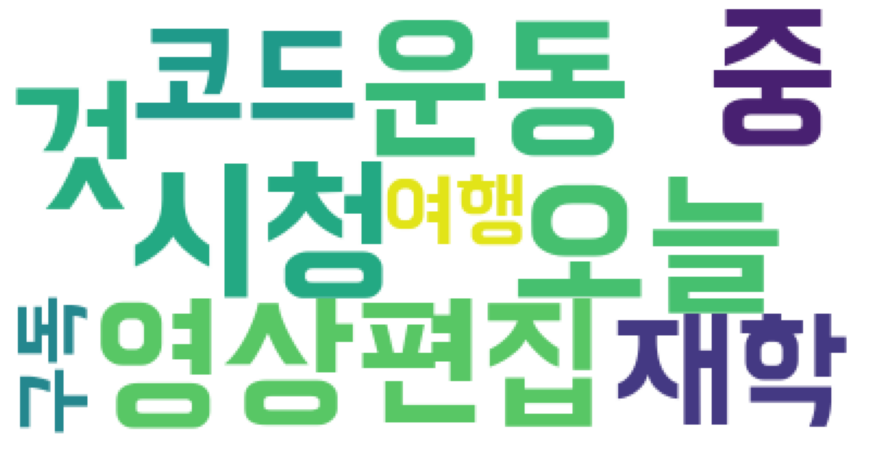

<Figure size 432x288 with 0 Axes>

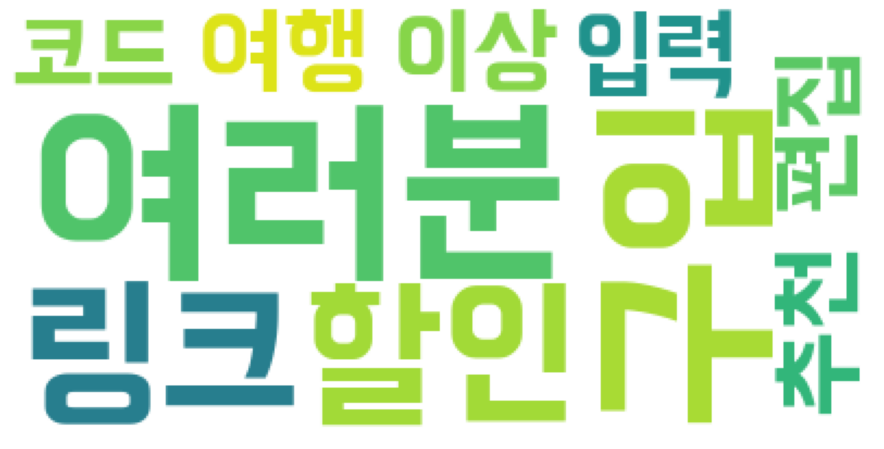

<Figure size 432x288 with 0 Axes>

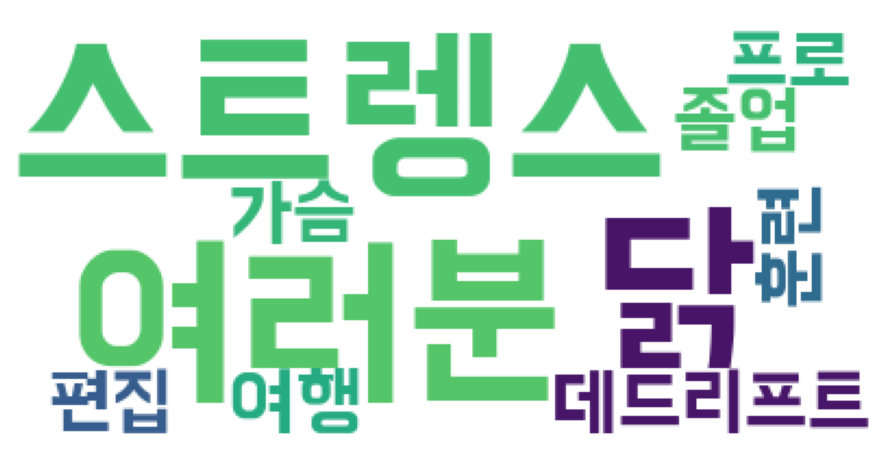

<ipython-input-207-f2face4e7384>:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  freq=pd.Series(data_word).value_counts().head(50)


ValueError: We need at least 1 word to plot a word cloud, got 0.

<Figure size 432x288 with 0 Axes>

In [207]:
#토픽별 word cloud
def flatten(l):
    flatList=[]
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList


for i in range(1,topic_num+1):
    data_list = globals()['df_{}'.format(i)].Keywords.values.tolist()
    data_word=[]
    
    for j in range(len(data_list)):
        try:
            data_word.append(okt.nouns(data_list[j]))
        except Exception as e:
            continue       
    data_word=flatten(data_word)
    data_word=[x for x in data_word if not x.isdigit()]
    
    freq=pd.Series(data_word).value_counts().head(50)
    freq=dict(freq)
    
    wordcloud = WordCloud(font_path="./Font/BMHANNA_11yrs_ttf.ttf",
             relative_scaling = 0.2,
             background_color = 'white',
            ).generate_from_frequencies(freq)
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

    plt.savefig("./topic("+str(i)+")wordcloud.png")

AttributeError: 'LdaModel' object has no attribute 'wordtopics'